# Статистика в Рandas

In [1]:
import pandas as pd
import numpy as np

Describe

In [4]:
df = pd.DataFrame({
    'feature_1':np.random.randn(100), 
    'feature_2':np.random.randn(100) * 3 + 4.,
    'feature_3':np.random.randn(100) * 0.1 - 3})

In [5]:
df

,feature_1,feature_2,feature_3
0,1.148959,7.110599,-3.096169
1,2.775559,2.430914,-3.069461
2,1.443097,4.442554,-2.966858
3,2.129519,6.949628,-2.940645
4,-0.558347,6.225472,-2.898422
...,...,...,...
95,-1.215563,1.311096,-2.928267
96,0.355683,1.944585,-3.064993
97,-0.343904,6.860372,-3.011393
98,-1.307451,3.350606,-3.088651


In [3]:
df.describe()

,feature_1,feature_2,feature_3
count,100.000000,100.000000,100.000000
mean,0.018717,3.449914,-3.003924
std,0.889619,2.783090,0.097101
min,-2.649829,-3.211333,-3.257832
25%,-0.565848,1.680492,-3.066894
50%,0.018622,3.341926,-2.999211
75%,0.740956,5.278909,-2.939265
max,1.884057,11.439502,-2.747487


In [7]:
df = pd.read_csv('abalone.csv')

In [8]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [9]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


1. Скользящие окна

In [10]:
def plot_rolling(df):
    plt.figure(figsize = (20, 12))
    plt.plot(df.Y.index, df.Y, label = 'raw data')
    plt.plot(df.Y.rolling(window = 12).mean(), label = 'rolling mean');
    plt.plot(df.Y.rolling(window = 12).std(), label = 'rolling std (x10)');
    plt.legend()

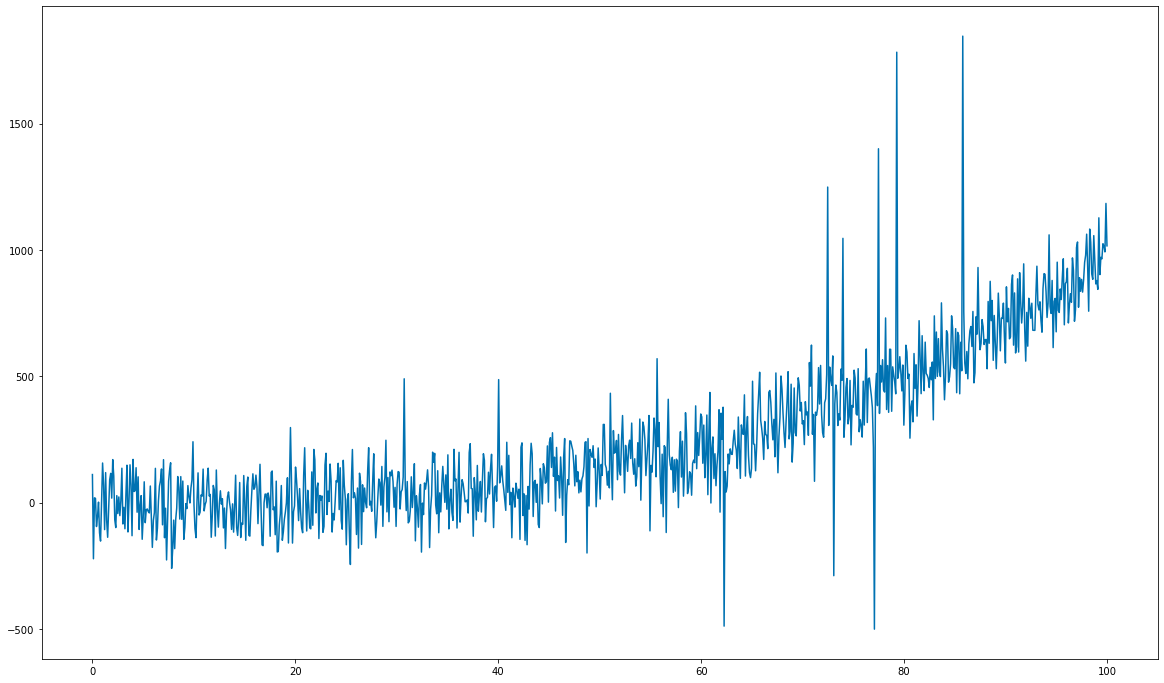

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')

f = lambda x: x ** 3 - 2 * x ** 2 + x - 1
f_q = lambda x: f(x)/1000 + np.random.randn(1) * 100
X = np.linspace(0, 100, 1000)
Y = np.array ([f_q(x) for x in X])
for i in range(20):
    ind = np.random.choice(np.arange(1000))
    Y[ind] = Y[ind] + np.random.choice([1, -1], p = [0.7, 0.3]) * Y[ind] / 0.5
plt.figure(figsize = (20, 12))
plt.plot(X, Y)

In [13]:
df = pd.DataFrame({'Y':Y.reshape(-1)})

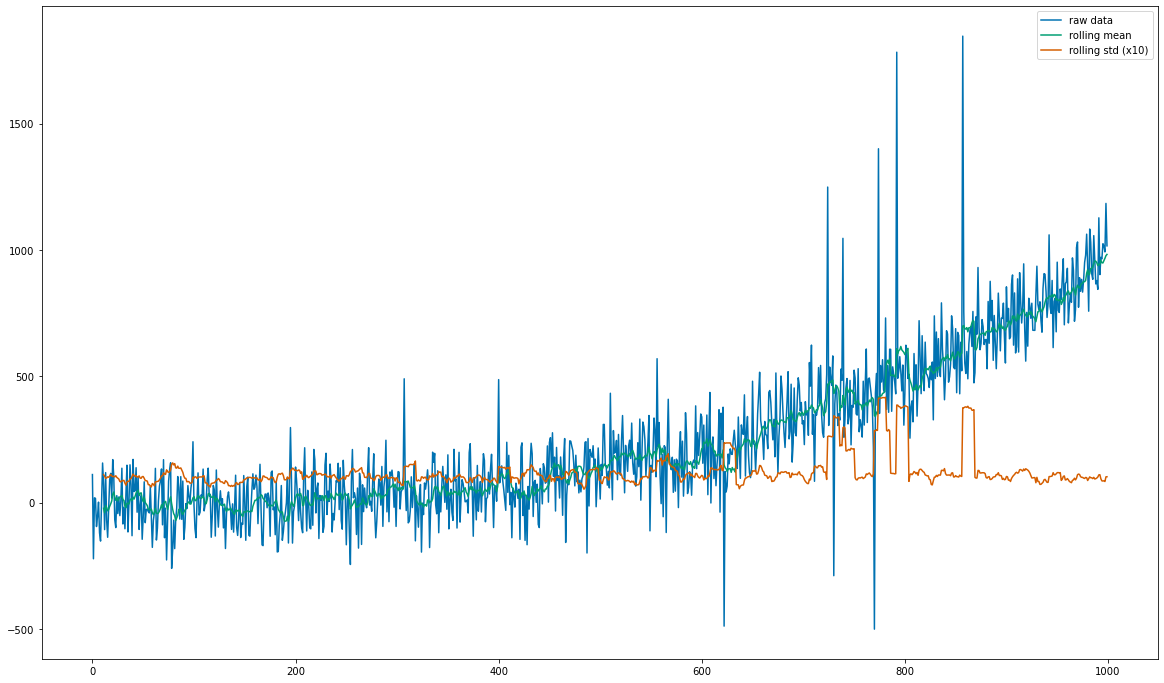

In [14]:
plot_rolling(df)

c:\Users\esgre\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


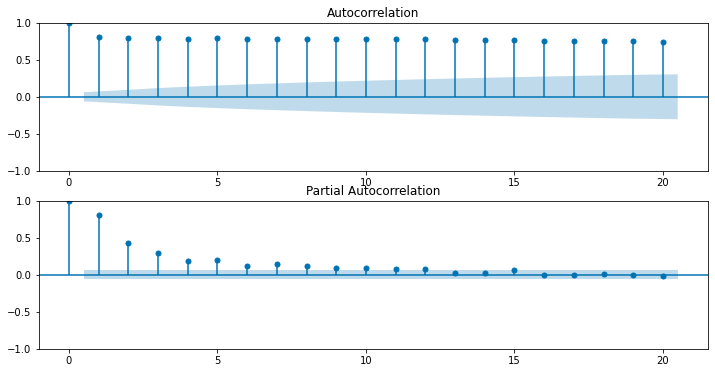

In [15]:
# Автокорреляции

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize = (12, 6))
ax[0] = plot_acf(df.Y.dropna(), ax = ax[0], lags = 20)
ax[1] = plot_pacf(df.Y.dropna(), ax = ax[1], lags = 20)

2. EWM и сглаживание

In [17]:
df = pd.DataFrame({'B':[0, 1, 2, 3, 4]})
df.ewm(com = 1)

ExponentialMovingWindow [com=1,min_periods=1,adjust=True,ignore_na=False,axis=0,method=single]

In [18]:
df.ewm(com = 1).mean()

,B
0,0.000000
1,0.666667
2,1.428571
3,2.266667
4,3.161290


3. Борьба с выбросами при помощи ewn 

In [19]:
df = pd.DataFrame({'Y':Y.reshape(-1)})

In [21]:
df['ewm'] = df.Y.ewm(30).mean()

In [22]:
df['true_f'] = [f(x) / 1000 for x in X]

<AxesSubplot:>

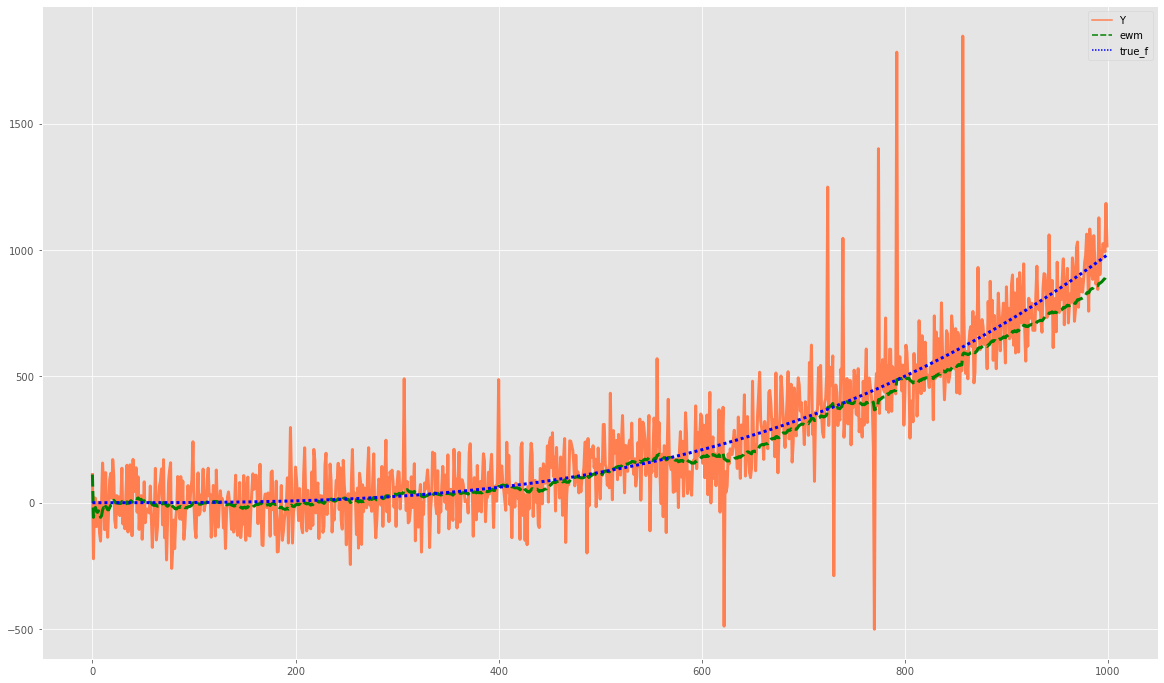

In [23]:
plt.figure(figsize = (20, 12))
plt.style.use('ggplot')
#plt.grid()
sns.lineplot(data = df, palette = ['#ff7f50', 'g', 'b'], linewidth = 3)

<AxesSubplot:>

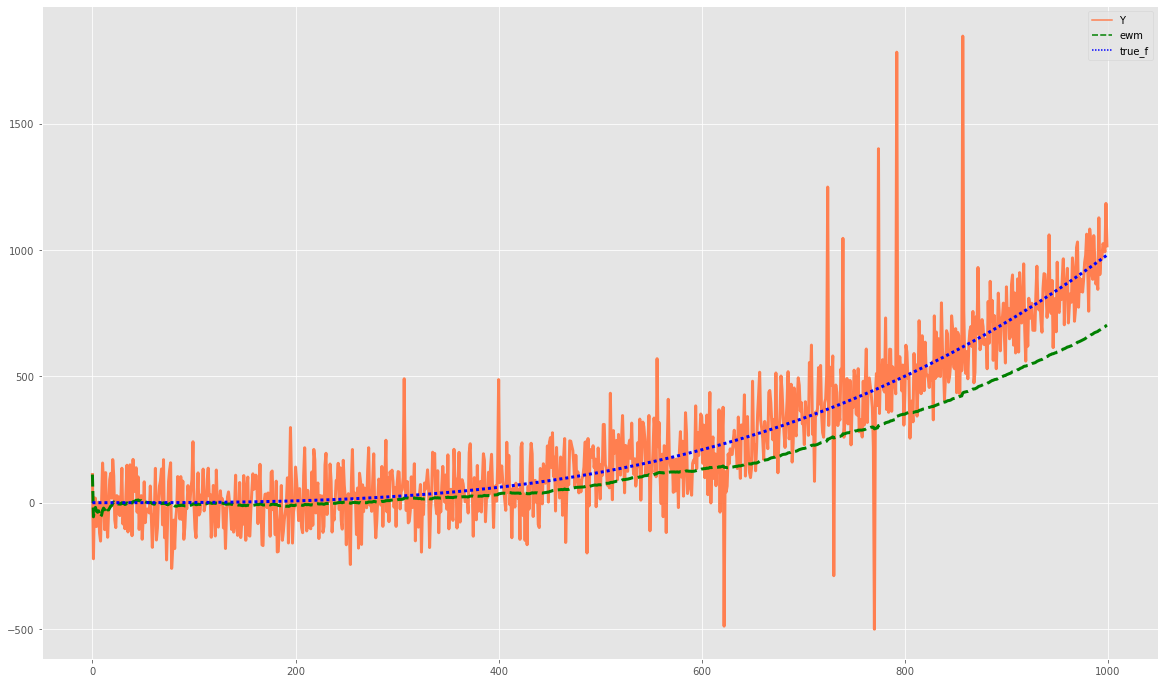

In [24]:
# изменение размера окна

df = pd.DataFrame({'Y':Y.reshape(-1)})
df['ewm'] = df.Y.ewm(120).mean()
df['true_f'] = [f(x) / 1000 for x in X]

plt.figure(figsize = (20, 12))
#plt.grid()
sns.lineplot(data = df, palette = ['#ff7f50', 'g', 'b'], linewidth = 3)

<AxesSubplot:>

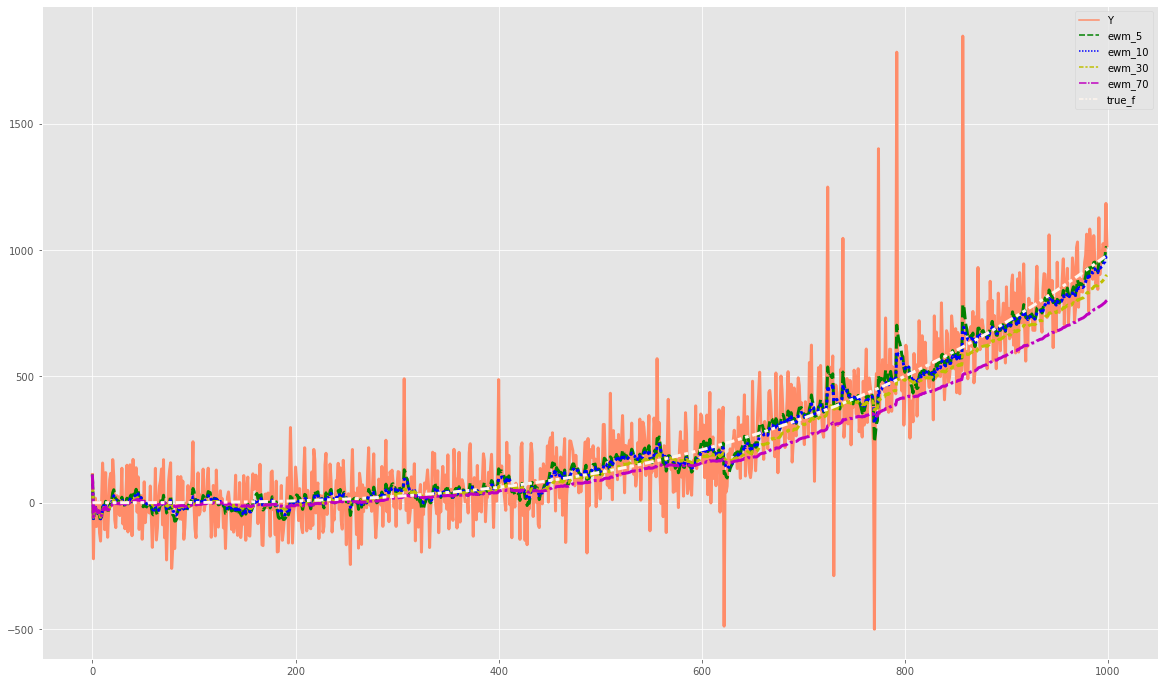

In [25]:
df = pd.DataFrame({'Y':Y.reshape(-1)})
df['ewm_5'] = df.Y.ewm(5).mean()
df['ewm_10'] = df.Y.ewm(10).mean()
df['ewm_30'] = df.Y.ewm(30).mean()
df['ewm_70'] = df.Y.ewm(70).mean()
df['true_f'] = [f(x) / 1000 for x in X]

plt.figure(figsize = (20, 12))
#plt.grid()
sns.lineplot(data = df, palette = ['#ff8c69', 'g', 'b', 'y', 'm', '#fff5ee'], linewidth = 3)